# Wine-tastic
By Ian Thomas

The Challenge: What makes a wine 'good'.
To answer this question, we have obtained the attached dataset with a collection of descriptive and physicochemical characteristics of more than 6000 different wines along with a 'quality rating'. The quality rating represents the median score from three wine experts from 0-10 where 0 is terrible and 10 is excellent. Please use any method(s) you find appropriate to help me understand what makes a wine ‘good’.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_regression

%matplotlib inline

In [2]:
wine_db = pd.read_csv("SAPio_DataScience_Challenge.csv")

# EDA

In [3]:
wine_db.sample(5)
# all vars are continuous except for type

,type,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
765,red,9.2,0.67,0.10,0.98,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,2006.0,6
98,red,7.6,0.90,0.06,0.85,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,2005.0,5
3787,white,6.4,0.18,0.32,0.65,9.6,0.052,24.0,90.0,0.99630,3.35,0.49,9.4,2003.0,6
5231,white,6.5,0.21,0.51,0.67,17.6,0.045,34.0,125.0,0.99966,3.20,0.47,8.8,2008.0,6
970,red,10.4,0.26,0.48,1.06,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,2006.0,6


In [4]:
wine_db.describe()

,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
count,6497.000000,6198.000000,6497.000000,6165.000000,4133.000000,6497.000000,6497.000000,6497.000000,6497.000000,6435.000000,6497.000000,6497.000000,6428.000000,6497.000000
mean,7.215307,0.339087,0.318633,0.751004,5.459098,0.056034,30.525319,115.744574,0.994697,3.218407,0.531268,10.491801,2005.494866,5.818378
std,1.296434,0.163832,0.145318,0.134546,4.832146,0.035034,17.749400,56.521855,0.002999,0.160600,0.148806,1.192712,1.723759,0.873255
min,3.800000,0.080000,0.000000,0.410000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,2001.000000,3.000000
25%,6.400000,0.230000,0.250000,0.670000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,2004.000000,5.000000
50%,7.000000,0.290000,0.310000,0.730000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,2005.000000,6.000000
75%,7.700000,0.400000,0.390000,0.800000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,2007.000000,6.000000
max,15.900000,1.580000,1.660000,1.620000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,2008.000000,9.000000


In [5]:
wine_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6198 non-null float64
citric acid             6497 non-null float64
astringency rating      6165 non-null float64
residual sugar          4133 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6435 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
vintage                 6428 non-null float64
quality                 6497 non-null int64
dtypes: float64(13), int64(1), object(1)
memory usage: 761.4+ KB


In [6]:
# the only non-numeric column is "type" so lets dummy it.
wine_db_dummied = wine_db.copy()
wine_db_dummied["type_is_white"] = pd.get_dummies(wine_db_dummied["type"])["white"]
wine_db_dummied.drop('type', axis = 1, inplace= True)

In [7]:
wine_db_dummied.sample(5)

,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality,type_is_white
3924,7.0,0.35,0.17,0.73,NaN,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,2004.0,6,1
120,7.3,1.07,0.09,0.83,NaN,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,2008.0,5,0
2018,7.4,0.31,0.28,0.77,1.6,0.050,33.0,137.0,0.99290,3.31,0.56,10.5,2007.0,6,1
3349,7.4,0.18,0.30,0.75,NaN,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,2006.0,6,1
2608,8.3,0.15,0.39,0.84,NaN,0.055,32.0,146.0,0.99300,3.08,0.39,10.5,2005.0,6,1


In [8]:
pd.value_counts(wine_db_dummied["type_is_white"])
# interesting class imbalance between red and white types

1    4898
0    1599
Name: type_is_white, dtype: int64

In [9]:
red_mask = wine_db_dummied["type_is_white"] == 0
white_mask = wine_db_dummied["type_is_white"] == 1
reds = wine_db_dummied.loc[red_mask]
whites = wine_db_dummied.loc[white_mask]

In [10]:
whites.groupby(wine_db_dummied.quality).size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [11]:
reds.groupby(reds.quality).size()
# not a single red scored more than an eight

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

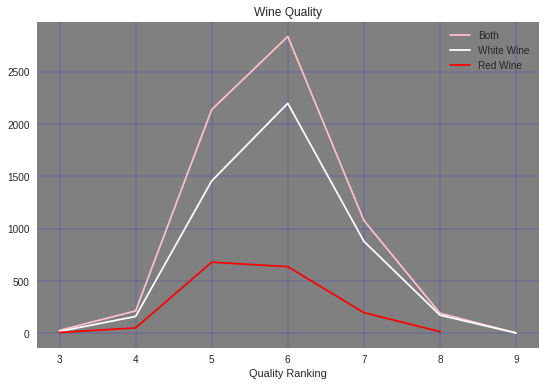

In [12]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor'] = 'grey'
plt.plot(wine_db_dummied.groupby(wine_db.quality).size(), 'pink', label = "Both")
plt.plot(whites.groupby(wine_db.quality).size(), 'w', label = "White Wine")
plt.plot(reds.groupby(wine_db.quality).size(), 'r', label = "Red Wine")
plt.title('Wine Quality')
plt.xlabel("Quality Ranking")
plt.grid(color='blue', linewidth=0.2)
plt.legend(loc=1)

In [13]:
wine_db_dummied.isnull().sum()
# out of the 14 independent vars, 5 had nan values, nearly 40% of residual sugar as missing

fixed acidity              0
volatile acidity         299
citric acid                0
astringency rating       332
residual sugar          2364
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                        62
sulphates                  0
alcohol                    0
vintage                   69
quality                    0
type_is_white              0
dtype: int64

## Cleaning Data: Helper Methods

In [14]:
# silences an incorrect copy error
pd.options.mode.chained_assignment = None


def cleanSelectedFeature(dataframe_1, dataframe_2, column_name_string, df_1_display_name = "", df_2_display_name = "", upper_limit = 0.99, lower_limit = 0.01):
    
    printMedianAndMeanValuesForFeature(dataframe_1, column_name_string, df_1_display_name)
    printMedianAndMeanValuesForFeature(dataframe_2, column_name_string, df_2_display_name)

    dataframe_1_outliers_removed = removeOutliersFromFeature(dataframe_1, column_name_string, upper_limit = upper_limit, lower_limit = lower_limit)
    dataframe_2_outliers_removed = removeOutliersFromFeature(dataframe_2, column_name_string)
     
    dataframe_1_nans_filled = fillNanValuesWithMedian(dataframe_1_outliers_removed, column_name_string)
    dataframe_2_nans_filled = fillNanValuesWithMedian(dataframe_2_outliers_removed, column_name_string)
    
    # Scatter Plots
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['grid.color'] = 'white'
    f, (ax1) = plt.subplots(1, 1, figsize = (7, 5))
    ax1.set_title(column_name_string + ' all data')
    ax1.plot(pd.concat([dataframe_1[column_name_string], dataframe_2[column_name_string]], axis=1), '.', color='pink')

    f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (15, 5))
    ax1.plot(dataframe_1[column_name_string], 'r.')
    ax1.plot(dataframe_2[column_name_string], 'w.')
    ax1.set_facecolor('black')
    ax1.set_title('Original - Wine Type Colored') 

    ax2.plot(dataframe_1_nans_filled[column_name_string], 'r.')
    ax2.plot(dataframe_2_nans_filled[column_name_string], 'w.')
    ax2.set_facecolor('black')
    ax2.set_title('Outliers Removed - Wine Type Colored') 

    # Box Plots
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['grid.color'] = 'grey'
    f, (ax3) = plt.subplots(1, 1, figsize = (7, 5))
    ax3 = pd.concat([dataframe_1[column_name_string], dataframe_1_nans_filled[column_name_string]], axis=1).boxplot()
    ax3.set_xticklabels([df_1_display_name + " Original", df_1_display_name + " Updated"])
    ax3.set_title(df_1_display_name + ", " + column_name_string + ", quartile examination")


    f, (ax4) = plt.subplots(1, 1, figsize = (7, 5))
    ax4 = pd.concat([dataframe_2[column_name_string], dataframe_2_nans_filled[column_name_string]], axis=1).boxplot()
    ax4.set_xticklabels([df_2_display_name + " Original", df_2_display_name + " Updated"])
    ax4.set_title(df_2_display_name + ", " + column_name_string + ", quartile examination")

    
    return dataframe_1_nans_filled, dataframe_2_nans_filled

def removeOutliersFromFeature(dataframe, column_name_string, upper_limit = 0.99, lower_limit = 0.01, silent = True):
    new_df = dataframe.copy()
    if silent == False:
        print ("initial number of NaNs: " + str(dataframe[column_name_string].isnull().sum()))
    lower_outlier_range_ar = new_df[column_name_string].quantile(lower_limit)
    upper_outlier_range_ar = new_df[column_name_string].quantile(upper_limit)
    
    new_df[column_name_string] = new_df[column_name_string][new_df[column_name_string] < upper_outlier_range_ar]
    new_df[column_name_string] = new_df[column_name_string][new_df[column_name_string] > lower_outlier_range_ar]
    
    if silent == False:
        print ("new number of NaNs: " + str(dataframe[column_name_string].isnull().sum()))
    return new_df

def printMedianAndMeanValuesForFeature(dataframe, column_name_string, display_prefix = ""):

    print (display_prefix + " " + column_name_string + " :\n  Mean   - " + str(dataframe[column_name_string].mean()) + 
           "\n  Median - " + str(dataframe[column_name_string].median()))

def fillNanValuesWithMedian(dataframe, column_name_string):
    new_df = dataframe.copy()
    
    current_median = new_df[column_name_string].median()
    new_df_column = new_df[[column_name_string]].fillna(current_median)
    new_df[column_name_string] = new_df_column
    return new_df

## Cleaning Feature: residual sugar

whites residual sugar :
  Mean   - 6.39324367595
  Median - 5.1
reds residual sugar :
  Mean   - 2.57064356436
  Median - 2.2


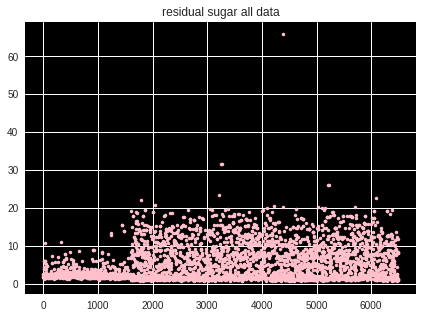

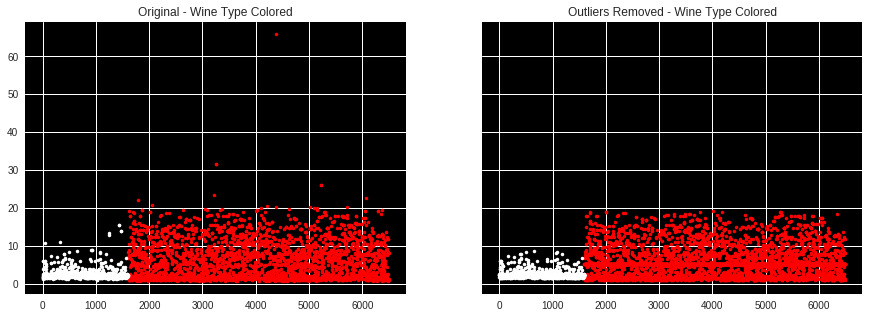

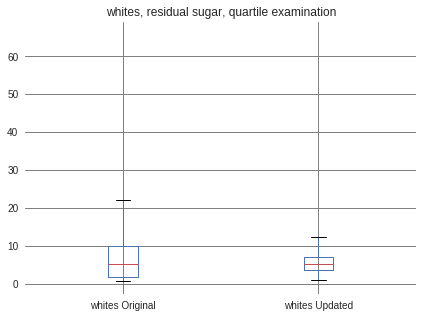

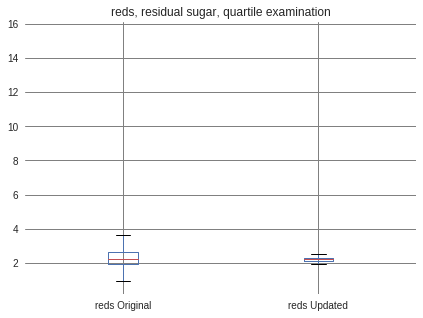

In [15]:
whites_updated, reds_updated = cleanSelectedFeature(whites, reds,
                                                    'residual sugar',
                                                    "whites", "reds")

## Cleaning Feature: astringency rating

whites astringency rating :
  Mean   - 0.708625888434
  Median - 0.7
reds astringency rating :
  Mean   - 0.880282522996
  Median - 0.84


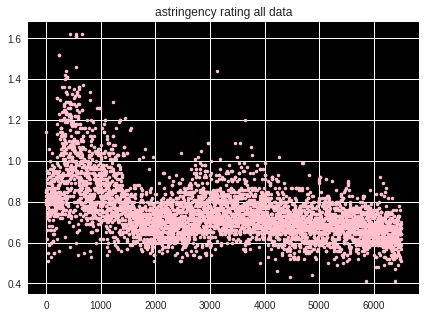

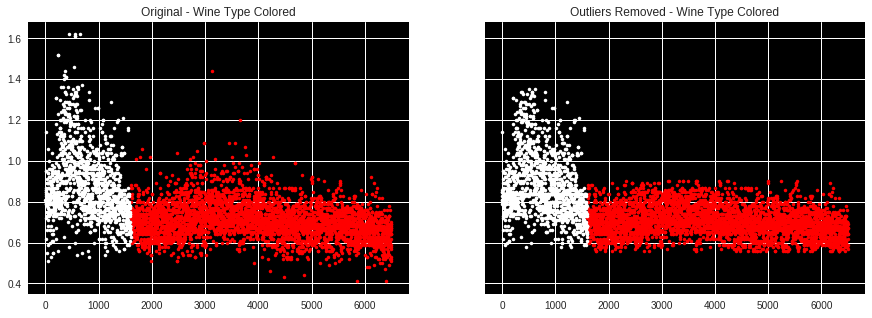

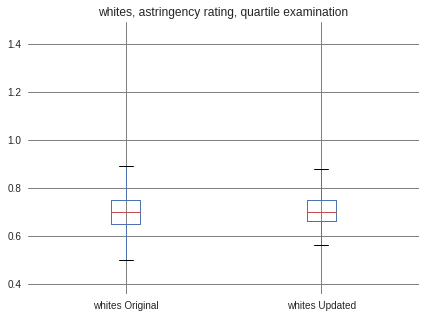

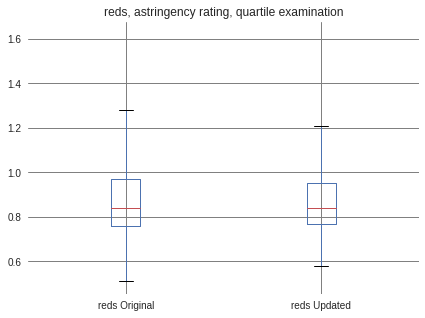

In [16]:
whites_updated, reds_updated = cleanSelectedFeature(whites_updated, reds_updated,
                                                    'astringency rating',
                                                    "whites", "reds",
                                                    upper_limit = .98, lower_limit = .02)

## Cleaning feature: volatile acidity

whites volatile acidity :
  Mean   - 0.277937152629
  Median - 0.26
reds volatile acidity :
  Mean   - 0.527282894737
  Median - 0.52


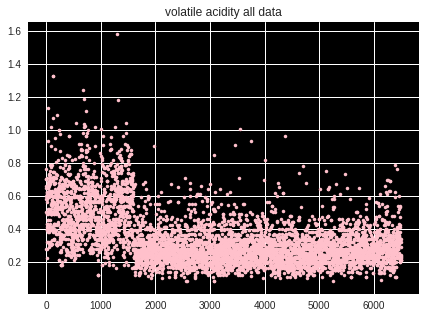

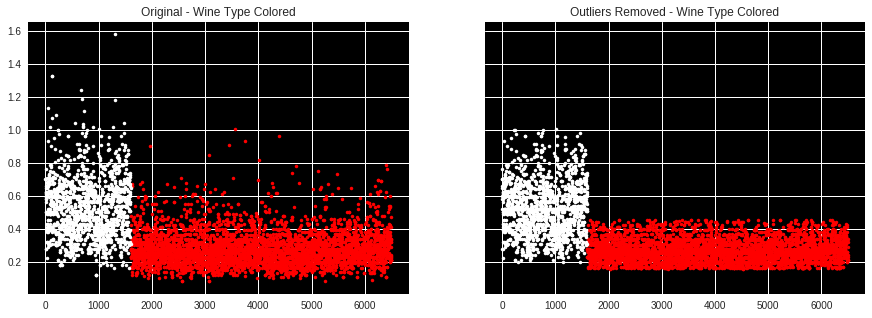

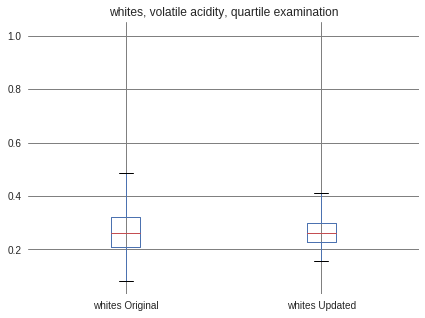

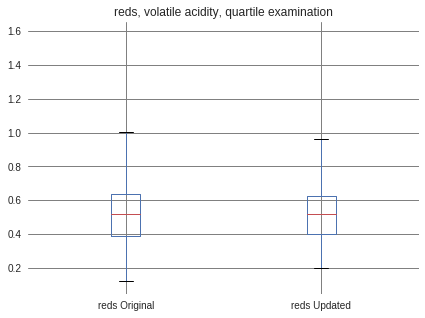

In [17]:
whites_updated, reds_updated = cleanSelectedFeature(whites_updated, reds_updated,
                                                    'volatile acidity',
                                                    "whites", "reds",
                                                    upper_limit = .95, lower_limit = .05)

## Cleaning feature: pH

whites pH :
  Mean   - 3.18822935969
  Median - 3.18
reds pH :
  Mean   - 3.31129277567
  Median - 3.31


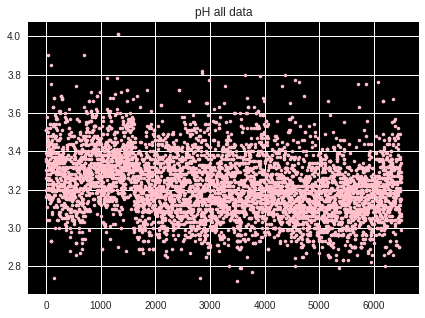

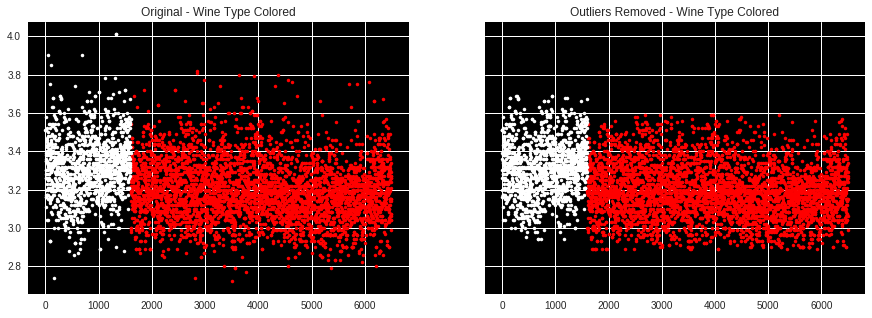

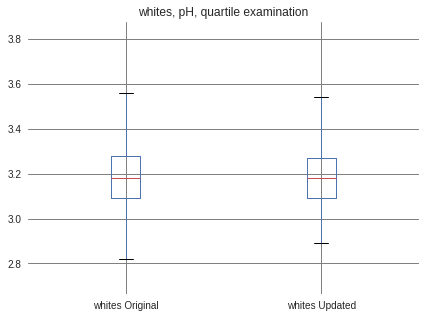

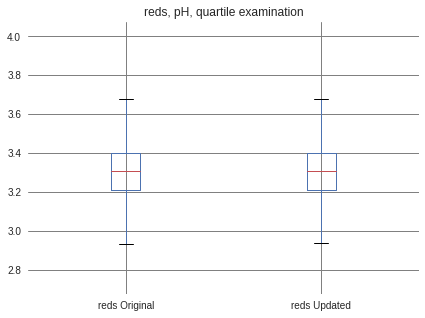

In [18]:
whites_updated, reds_updated = cleanSelectedFeature(whites_updated, reds_updated,
                                                    'pH',
                                                    "whites", "reds")

## Cleaning feature: vintage

#### Whites

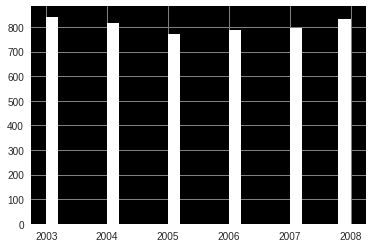

In [19]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'grey'
whites_updated["vintage"].hist(bins = 25, color = "white")

In [20]:
whites_updated.isnull().sum()
# 52 null values in this DF and all are in "vintage" feature

fixed acidity            0
volatile acidity         0
citric acid              0
astringency rating       0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
vintage                 52
quality                  0
type_is_white            0
dtype: int64

In [21]:
whites_updated.dropna(axis=0, inplace = True)

In [22]:
whites_updated["vintage"].isnull().sum()

0

#### Reds

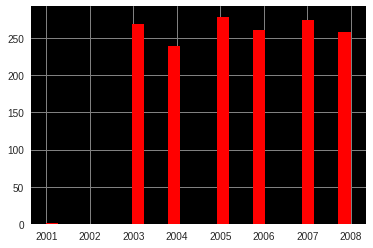

In [23]:
reds_updated["vintage"].hist(bins = 25, color = "red")

In [24]:
reds_updated.isnull().sum()
# 17 null values in this DF

fixed acidity            0
volatile acidity         0
citric acid              0
astringency rating       0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
vintage                 17
quality                  0
type_is_white            0
dtype: int64

In [25]:
reds_updated.dropna(axis=0, inplace = True)

In [26]:
reds_updated["vintage"].isnull().sum()

0

## Cleaning Feature: density

whites density :
  Mean   - 0.994027177053
  Median - 0.993745
reds density :
  Mean   - 0.99674682048
  Median - 0.99675


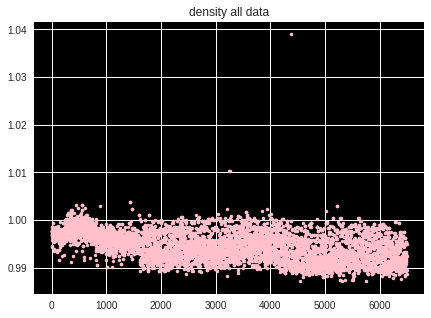

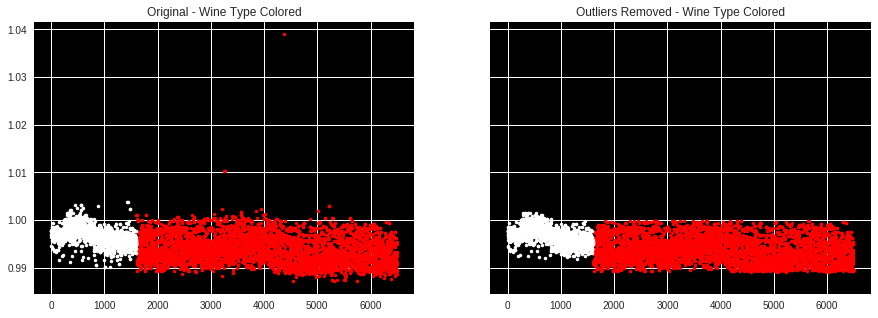

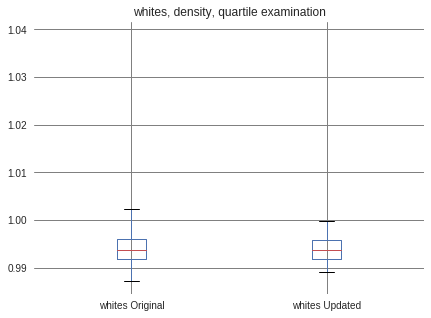

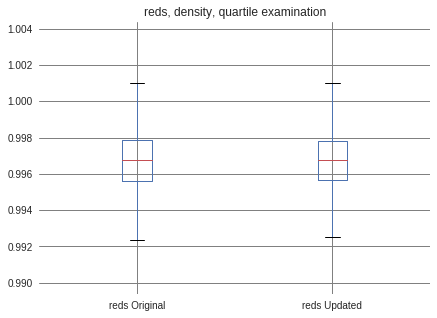

In [27]:
whites_updated, reds_updated = cleanSelectedFeature(whites_updated, reds_updated,
                                                    'density',
                                                    "whites", "reds",
                                                    upper_limit = .98, lower_limit = .02)

In [28]:
wine_db_nan_removed = pd.concat([whites_updated, reds_updated], axis=0)

In [29]:
wine_db_nan_removed.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
astringency rating      0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
vintage                 0
quality                 0
type_is_white           0
dtype: int64

### All nans and outliers removed

## Handling multicollinearity

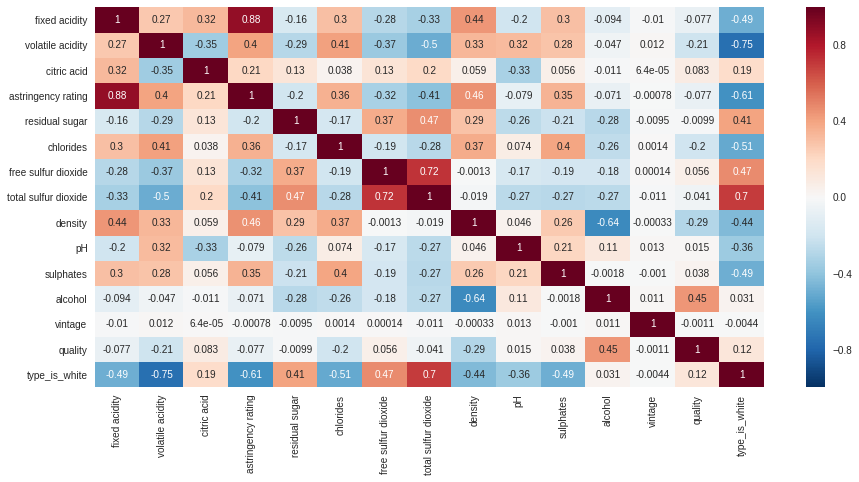

In [30]:
f, (heatmap) = plt.subplots(1, 1, figsize = (15, 7))
heatmap = sns.heatmap(wine_db_nan_removed.corr(), annot = True)

In [31]:
# remove "independent" vars that correlate with each other > 0.7
# keeping quality and type_is_white
wine_db_non_collinear = wine_db_nan_removed.drop(["astringency rating", "free sulfur dioxide"], axis = 1)

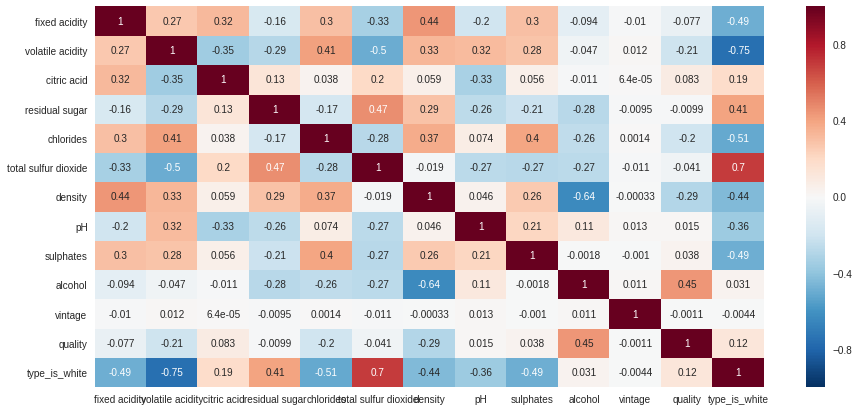

In [32]:
f, (heatmap) = plt.subplots(1, 1, figsize = (15, 7))
heatmap = sns.heatmap(wine_db_non_collinear.corr(), annot = True)

## Examining feature normality

In [33]:
def generate_histograms_for_columns(df, columns):
    for column in columns:
        fig, ax = plt.subplots()
        ax = df[column].hist(bins = 40)
        ax.set_title("hist: " + column)
        plt.show()
        print (stats.normaltest(df[column], axis = 0), end="\n\n\n")

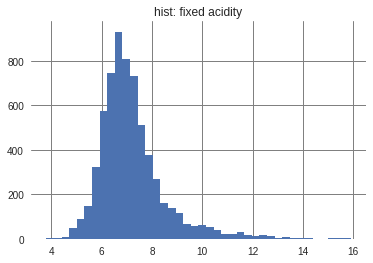

NormaltestResult(statistic=2303.1665814915323, pvalue=0.0)




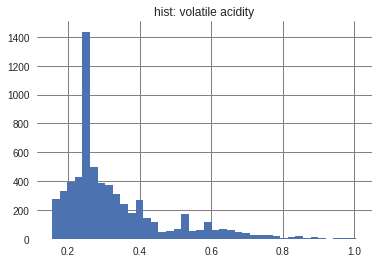

NormaltestResult(statistic=1816.9904670967451, pvalue=0.0)




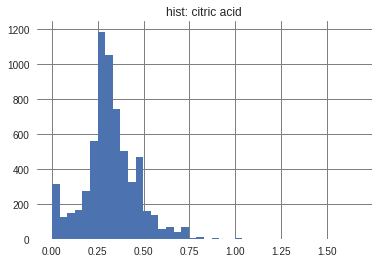

NormaltestResult(statistic=585.69129612973131, pvalue=6.5879606437797503e-128)




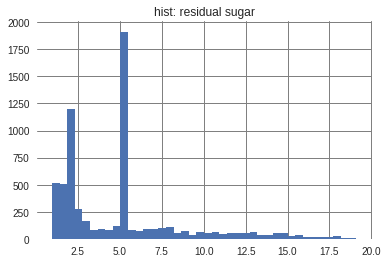

NormaltestResult(statistic=1627.3649211580182, pvalue=0.0)




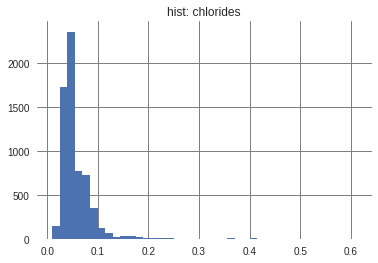

NormaltestResult(statistic=6991.3994341930629, pvalue=0.0)




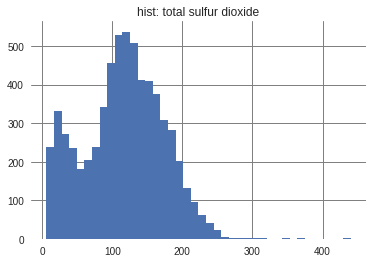

NormaltestResult(statistic=54.724892579486095, pvalue=1.3080988534161283e-12)




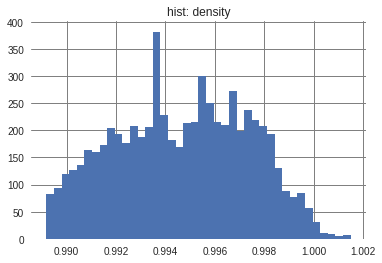

NormaltestResult(statistic=885.77008078864526, pvalue=4.5443402316016892e-193)




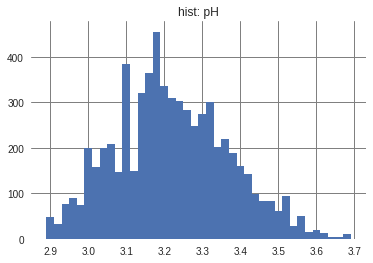

NormaltestResult(statistic=94.806718464460687, pvalue=2.5881095886076269e-21)




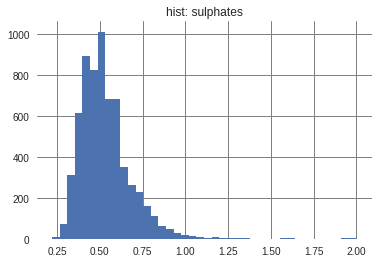

NormaltestResult(statistic=2719.0352533881787, pvalue=0.0)




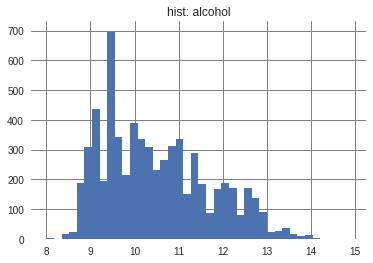

NormaltestResult(statistic=445.7240689223712, pvalue=1.6302274732725544e-97)




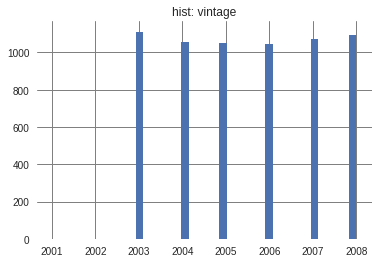

NormaltestResult(statistic=15747.83585603398, pvalue=0.0)




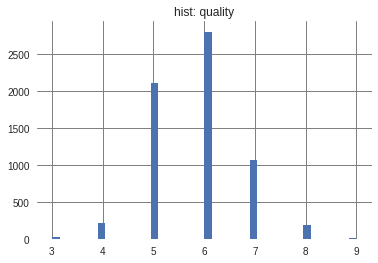

NormaltestResult(statistic=49.848159012493262, pvalue=1.4983380342602476e-11)




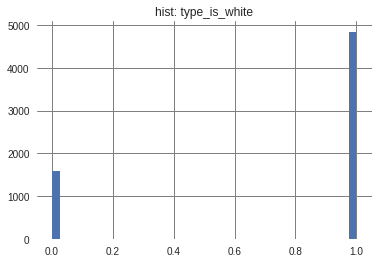

NormaltestResult(statistic=1187.5071075135722, pvalue=1.3680689714795186e-258)




In [34]:
generate_histograms_for_columns(wine_db_non_collinear, wine_db_non_collinear.columns)

## Selecting the most normal features

In [35]:
wine_db_normal_features_plus_wine_type = wine_db_non_collinear[["fixed acidity",
                                                 "volatile acidity",
                                                 "citric acid",
                                                 "chlorides",
                                                 "pH",
                                                 "sulphates",
                                                 "quality",
                                                 "type_is_white"]]

In [36]:
red_mask_updated = wine_db_normal_features_plus_wine_type["type_is_white"] == 0
white_mask_updated = wine_db_normal_features_plus_wine_type["type_is_white"] == 1

reds_normal = wine_db_normal_features_plus_wine_type.loc[red_mask]
whites_normal = wine_db_normal_features_plus_wine_type.loc[white_mask]

reds_normal.drop("type_is_white", axis = 1, inplace = True)
whites_normal.drop("type_is_white", axis = 1, inplace = True)

wine_db_normal = pd.concat([whites_normal, reds_normal], axis=0)

# Important Features of Wine Quality

In [37]:
def selectBestFeatures(df, title = ""):
    select_best = SelectKBest(f_regression, k = 'all')
    X = df.drop("quality", axis = 1)
    y = df["quality"]
    select_best.fit_transform(X, y)
    
    sortedScores = list(zip(list(X.columns), list(select_best.scores_)))
    sortedScores.sort(key = lambda x: x[1], reverse = True)
    
    column_names = [x[0] for x in sortedScores]
    scores = [x[1] for x in sortedScores]
    x = np.arange(len(column_names))
    f, (scorePlot) = plt.subplots(1, 1, figsize = (7, 4))
   
    if title == "Reds":
        scorePlot = plt.bar(x, scores, color = "r")
    elif title == "Whites":
        scorePlot = plt.bar(x, scores, color = "w")
    else:
        scorePlot = plt.bar(x, scores, color = "pink")
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['grid.color'] = 'grey'
    plt.xticks(x, column_names)
    plt.title(title + ", best features by score")
    

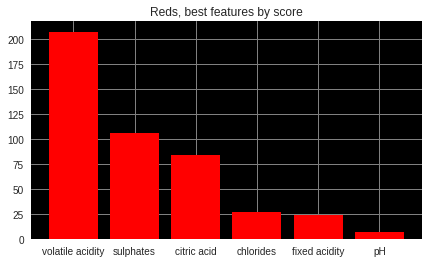

In [56]:
selectBestFeatures(reds_normal, title = "Reds")

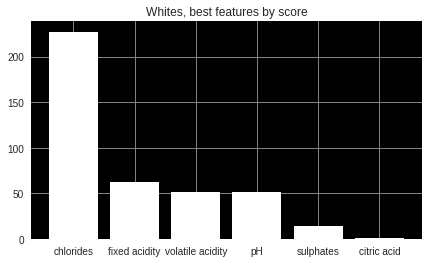

In [39]:
selectBestFeatures(whites_normal, title = "Whites")

In [40]:
reds_normal.loc[(reds_normal['quality'] == 8)].sample(5)

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,quality
498,10.7,0.35,0.53,0.070,3.15,0.65,8
1120,7.9,0.54,0.34,0.076,3.20,0.72,8
1449,7.2,0.38,0.31,0.056,3.23,0.76,8
278,10.3,0.32,0.45,0.073,3.23,0.82,8
495,10.7,0.35,0.53,0.070,3.15,0.65,8


In [41]:
whites_normal.loc[(whites_normal['quality'] == 9)]

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,quality
2373,9.1,0.27,0.45,0.035,3.20,0.46,9
2419,6.6,0.36,0.29,0.021,3.41,0.61,9
2426,7.4,0.24,0.36,0.031,3.28,0.48,9
2475,6.9,0.36,0.34,0.018,3.28,0.36,9
3204,7.1,0.26,0.49,0.032,3.37,0.42,9


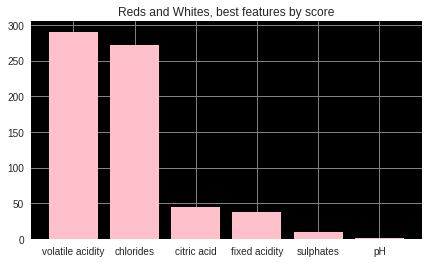

In [42]:
selectBestFeatures(wine_db_normal, title = "Reds and Whites")

In [43]:
wine_db_normal.loc[(wine_db_normal['quality'] == 9)]

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,quality
2373,9.1,0.27,0.45,0.035,3.20,0.46,9
2419,6.6,0.36,0.29,0.021,3.41,0.61,9
2426,7.4,0.24,0.36,0.031,3.28,0.48,9
2475,6.9,0.36,0.34,0.018,3.28,0.36,9
3204,7.1,0.26,0.49,0.032,3.37,0.42,9


 ## Regression Analysis

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

In [45]:
X = wine_db_normal.drop("quality", axis = 1)
y = wine_db_normal["quality"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2017)

In [46]:
lin_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression(n_jobs = -1))
])

In [47]:
linear_reg_gts = GridSearchCV(lin_reg_pipe, {}, cv = 5, n_jobs=-1)
linear_reg_gts.fit(X_train, y_train)
linear_reg_gts.score(X_test, y_test)

0.084002256135811804

In [48]:
predictions = linear_reg_gts.predict(X_test)
X_test["predicted"] = predictions.round(0) # round to nearest whole number

In [49]:
X_test.sample(5)

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,predicted
5892,7.2,0.21,0.36,0.045,3.25,0.76,6.0
874,10.4,0.52,0.46,0.104,3.12,0.65,5.0
1346,6.1,0.52,0.01,0.056,3.52,0.56,6.0
2393,7.4,0.32,0.27,0.049,3.03,0.52,6.0
5071,6.7,0.16,0.36,0.045,3.30,0.59,6.0


In [50]:
X_test["diff"] = y_test - X_test["predicted"]
X_test["diff abs"] = abs(y_test - X_test["predicted"])

In [51]:
X_test.sample(5)

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,predicted,diff,diff abs
3730,7.1,0.22,0.32,0.056,3.37,0.38,6.0,0.0,0.0
82,7.4,0.50,0.47,0.086,3.36,0.57,6.0,-1.0,1.0
4785,8.7,0.30,0.59,0.046,3.06,0.56,6.0,-2.0,2.0
6251,6.1,0.38,0.47,0.051,3.24,0.50,6.0,-1.0,1.0
4364,6.4,0.27,0.29,0.028,3.18,0.37,6.0,0.0,0.0


In [52]:
diff_in_pred_pos_and_neg = X_test.groupby(X_test["diff"]).size()
diff_in_pred_abs = X_test.groupby(X_test["diff abs"]).size()

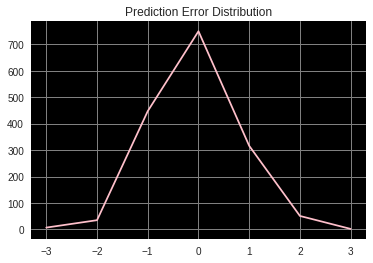

In [53]:
plt.plot(diff_in_pred_pos_and_neg, 'pink')
plt.title("Prediction Error Distribution")

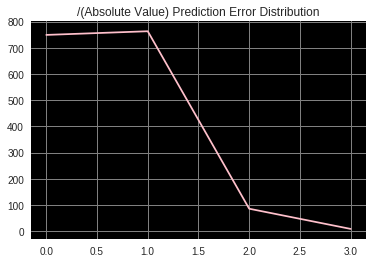

In [54]:
plt.plot(diff_in_pred_abs, "pink")
plt.title("/(Absolute Value) Prediction Error Distribution")

In [55]:
def evaluatePredictionAccuracy(df, prediction_series):
    total_predictions = len(df)
    
    correct_pred = prediction_series[0]
    print ("Correct rate: " + str(correct_pred/total_predictions))
    off_by_one = prediction_series[1]
    print ("One or less than rate: " + str((off_by_one + correct_pred)/total_predictions))
    
evaluatePredictionAccuracy(X_test, diff_in_pred_abs)

Correct rate: 0.4660858743
One or less than rate: 0.940883634101


## End of Notebook